In [1]:
import numpy as np
import random
import argparse
import torch

from examples.simple_example import example_plot_all_algo_lag, example_plot_walk_forward
from utils.others import create_folder

from models.ind_multi_model import IndependentMultiModel
from models.train_model import BaseTrainMultiTask
from models.GP_multi_out import GPMultiTaskMultiOut
from models.GP_multi_index import GPMultiTaskIndex

from utils.data_structure import DatasetTaskDesc

import warnings
warnings.filterwarnings("ignore")

np.random.seed(48)
random.seed(48)
torch.manual_seed(48)
torch.random.manual_seed(48)

In [3]:
from experiments import algo_dict

for (_, v) in algo_dict.algorithms_dic.items():
    v[0]["is_verbose"] = False

In [4]:
exp_setting1 = {
    "task": {
        "sub_model": ["GP-Multi-Task", "GP-Multi-Task"],
        "dataset": [
            DatasetTaskDesc(
                inp_metal_list=["aluminium", "copper"],
                use_feature=["Date", "copper.Price"],
                use_feat_tran_lag=[None, (22, 1, lambda x: x)],
                out_feature="aluminium.Price",
                out_feat_tran_lag=(22, 1, lambda x: x),
            ),
            DatasetTaskDesc(
                inp_metal_list=["aluminium", "copper"],
                use_feature=["Date"],
                use_feat_tran_lag=None,
                out_feature="copper.Price",
                out_feat_tran_lag=(22, 1, lambda x: x),
            ),
        ],
        # Only used for plot all_algo_lag
        "len_pred_show": [100, 100]
    }, "algo": GPMultiTaskMultiOut, 
    "using_first": True
}

exp_setting2 = {
    "task": {
        "sub_model": ["GP-Test", "GP-Test"],
        "dataset": [
            DatasetTaskDesc(
                inp_metal_list=["aluminium"],
                use_feature=["Date"],
                use_feat_tran_lag=None,
                out_feature="aluminium.Price",
                out_feat_tran_lag=(22, 1, lambda x: x),
            ),
            DatasetTaskDesc(
                inp_metal_list=["copper"],
                use_feature=["Date"],
                use_feat_tran_lag=None,
                out_feature="copper.Price",
                out_feat_tran_lag=(22, 1, lambda x: x),
            ),
        ],
        # Only used for plot all_algo_lag
        "len_pred_show": [100, 100]
    }, "algo": IndependentMultiModel, 
    "using_first": False
}

exp_setting3 = {
    "task": {
        "sub_model": ["GP-Multi-Task", "GP-Multi-Task"],
        "dataset": [
            DatasetTaskDesc(
                inp_metal_list=["aluminium"],
                use_feature=["Date"],
                use_feat_tran_lag=None,
                out_feature="aluminium.Price",
                out_feat_tran_lag=(22, 1, lambda x: x),
            ),
            DatasetTaskDesc(
                inp_metal_list=["copper"],
                use_feature=["Date"],
                use_feat_tran_lag=None,
                out_feature="copper.Price",
                out_feat_tran_lag=(22, 1, lambda x: x),
            ),
        ],
        # Only used for plot all_algo_lag
        "len_pred_show": [100, 100]
    }, "algo": GPMultiTaskIndex, 
    "using_first": False
}

Running Multi-Task GP
At fold 1 / 3
At fold 2 / 3
At fold 3 / 3
+-------------------------------------------------------+-------------+------------------+
|                                                       |   All Error |   Interval Error |
+=======================================================+=============+==================+
| Task 1 (Metal=aluminium+copper, Lag=22, Step ahead=1) |   0.0021342 |        0.0021342 |
+-------------------------------------------------------+-------------+------------------+
| Task 2 (Metal=aluminium+copper, Lag=22, Step ahead=1) |   0.0100533 |        0.0100533 |
+-------------------------------------------------------+-------------+------------------+


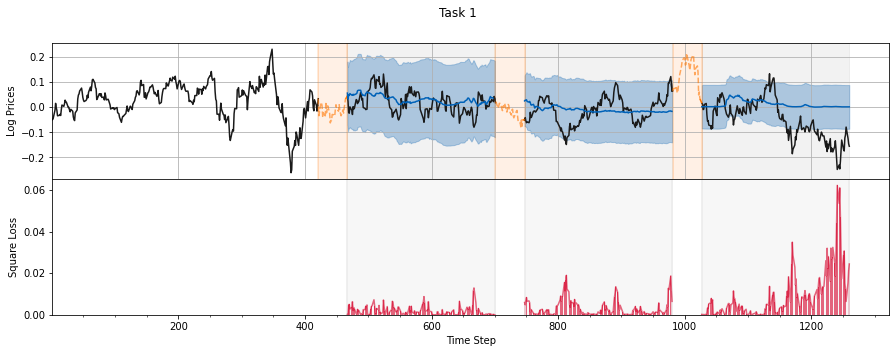

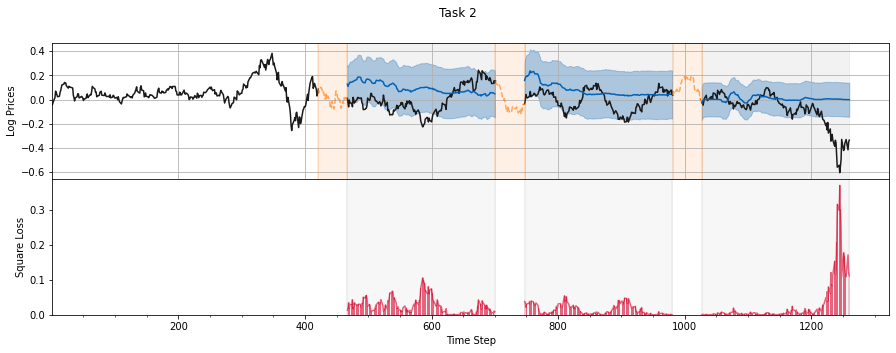

In [5]:
print("Running Multi-Task GP")
example_plot_walk_forward(exp_setting1, "Multi-GP",
    is_save=True, is_load=False,
    load_path="Multi-GP"
)

Running Independent GP
At fold 1 / 3
Training Model: 0/2
Training Model: 1/2
At fold 2 / 3
Training Model: 0/2
Training Model: 1/2
At fold 3 / 3
Training Model: 0/2
Training Model: 1/2
+------------------------------------------------+-------------+------------------+
|                                                |   All Error |   Interval Error |
+================================================+=============+==================+
| Task 1 (Metal=aluminium, Lag=22, Step ahead=1) |   0.0021269 |        0.0021269 |
+------------------------------------------------+-------------+------------------+
| Task 2 (Metal=copper, Lag=22, Step ahead=1)    |   0.0181389 |        0.0181389 |
+------------------------------------------------+-------------+------------------+


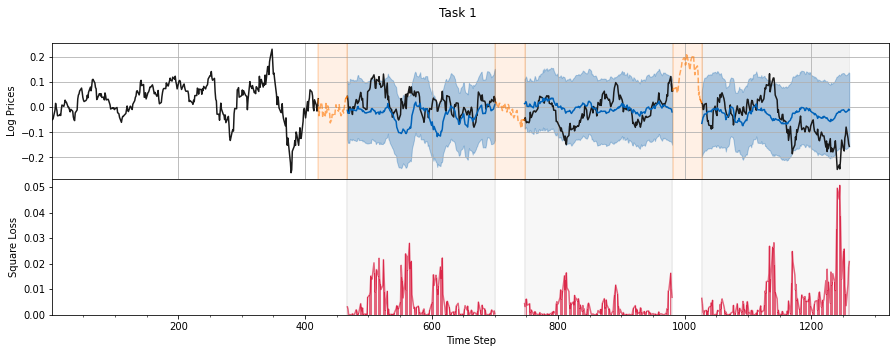

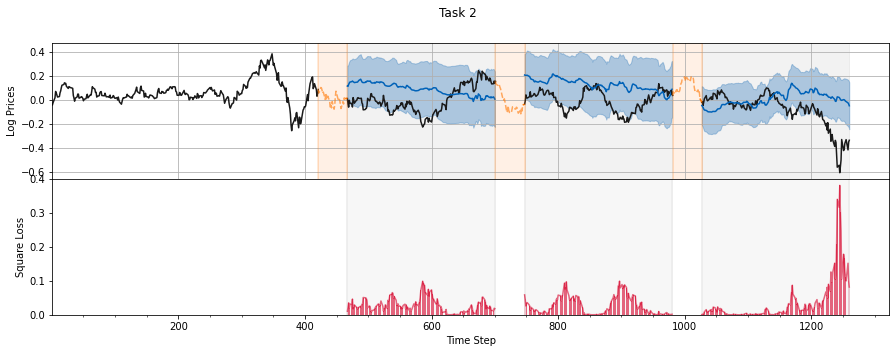

In [6]:
print("Running Independent GP")
example_plot_walk_forward(exp_setting2, "Independent-GP",
    is_save=True, is_load=False,
    load_path="Independent-GP"
)

Running Multi-Task with Index GP
At fold 1 / 3
At fold 2 / 3
At fold 3 / 3
+------------------------------------------------+-------------+------------------+
|                                                |   All Error |   Interval Error |
+================================================+=============+==================+
| Task 1 (Metal=aluminium, Lag=22, Step ahead=1) |   0.002742  |        0.002742  |
+------------------------------------------------+-------------+------------------+
| Task 2 (Metal=copper, Lag=22, Step ahead=1)    |   0.0133233 |        0.0133233 |
+------------------------------------------------+-------------+------------------+


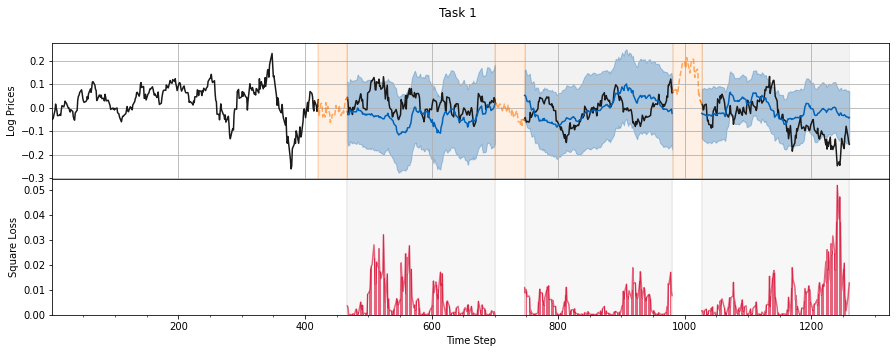

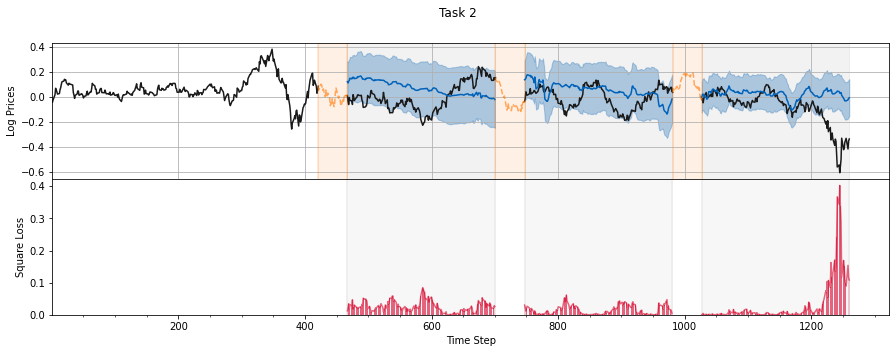

In [8]:
print("Running Multi-Task with Index GP")
example_plot_walk_forward(exp_setting3, "Independent-GP",
    is_save=True, is_load=False,
    load_path="Independent-GP"
)